## 04 - Introduction to Frequency Analysis

Previously, we studied how to apply filters to images, allowing to enhance some of the visual characteristics of the image, while suppressing or eliminating others. For example, the mean filter smooths the image enhancing flat regions, while removing local transitions and variance. On the other hand, a Laplacian filter, which is based on the second derivative, detects borders and transitions, while removing information from the flat regions.

Those different image patterns are described by how intensities change along the pixels. Some image region for which the neighbours show fast transition of intensitites may indicate the edge of an object, noise, a texture pattern, or even details of a given object.

Here, we are going to introduce how to analyse signals $f(x)$ and images $f(x,y)$ with respect to the intensity oscilation/variation along the variables $x$ and/or $y$ in terms of **frequencies** defined by mathematical functions.

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
img1 = imageio.imread("images/pattern.png")
img2 = imageio.imread("images/gradient_noise.png")
img3 = imageio.imread("images/sin1.png")

The image below is a ramp of intensities with noise. Therefore, its values have a high degree of local variation. Let us plot the image and show the values relative to a small region of pixels. Note how each pixel is different in each neighbour region.

(-0.5, 319.5, 319.5, -0.5)

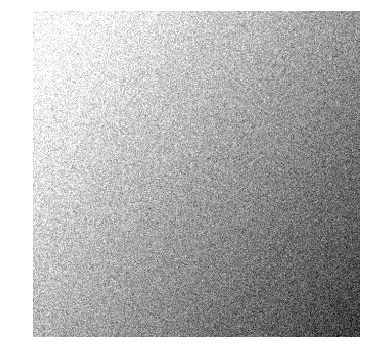

In [3]:
plt.figure(figsize=(6,6)) 
plt.imshow(img2, cmap="gray")
plt.axis('off')

In [4]:
print(img2[200:210, 200:210])

[[159 119 110 154 144 134 147 121 157 135]
 [170 171 151 154 152 141 141 126 131 160]
 [150 163 133 147 153 130 133 148 158 145]
 [153 136 128 134 114 141 136 151 136 128]
 [139 137 115 130 136 145 137 118 171 151]
 [166 130 120 197 146 151 130 146 132 191]
 [128 137 130 109 130 167 162 151 120 153]
 [156 140 134 120 147 154 142 120 135 130]
 [136 141 141 106 122 141 128 120 170 108]
 [144 157 178 129 131 146 130 135 136 140]]


Showing more examples, below, with flat regions indicating no local variation, and with more smooth transitions

[[127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]
 [127 127 127 127 127 127 127 127 127 127]]


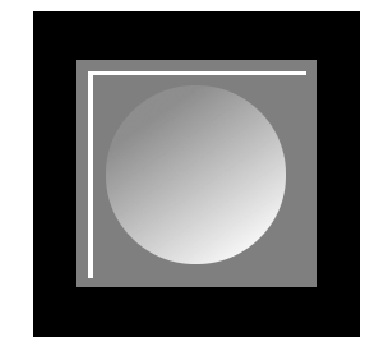

In [9]:
plt.figure(figsize=(6,6)) 
plt.imshow(img1, cmap="gray"); plt.axis('off')
print(img1[200:210, 200:210])

[[ 8  4  3  7 11 15 19 23 27 30]
 [ 4  3  7 11 15 19 23 27 31 34]
 [ 3  7 11 15 19 23 27 31 35 38]
 [ 7 11 15 19 23 27 31 35 39 42]
 [11 15 19 23 27 31 35 39 43 46]
 [15 19 23 27 31 35 39 43 46 50]
 [19 23 27 31 35 39 43 47 50 54]
 [23 27 31 35 39 43 47 50 54 58]
 [27 31 35 39 43 46 50 54 58 62]
 [30 34 38 42 46 50 54 58 62 66]]


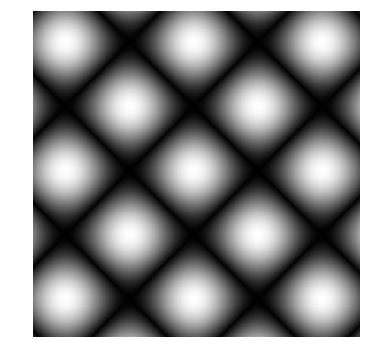

In [11]:
plt.figure(figsize=(6,6)) 
plt.imshow(img3, cmap="gray")
plt.axis('off')

print(img3[200:210, 200:210])

Intuitively, we would like to have a method that allows discriminating information related to smooth, slower, transitions from those related to faster oscilation of intensities.

### Frequency Analysis

A way to interpret such characteristics is via **frequencies** in which *lower* frequencies are related to smooth transitions, while *higher* frequencies are related to abrupt changes along $x$ or $x,y$.

The **Fourier Transform** is a method to *describe* signals in terms of the frequency content. But before delving into this method, let us first motivate and give the rationale behind the description of signals in frequencies.

Let us start with a 1D vector containing 128 elements by fixing the coordinate $x=100$ and varying $y$, as follows.


[118 116 114 112 110 108 106 103 101  98  96  93  90  87  84  81  78  75
  71  68  65  61  58  54  50  47  43  39  35  31  27  24  20  16  12   8
   4   3   7  11  15  19  23  27  31  35  38  42  46  50  53  57  60  64
  67  71  74  77  80  83  86  89  92  95  97 100 102 104 107 109 111 113
 114 116 118 119 120 122 123 124 124 125 126 126 127 127 127 127 127 127
 126 126 125 124 124 123 122 120 119 118 116 115 113 111 109 107 105 102
 100  97  95  92  89  86  84  80  77  74  71  68  64  61  57  54  50  46
  43  39]


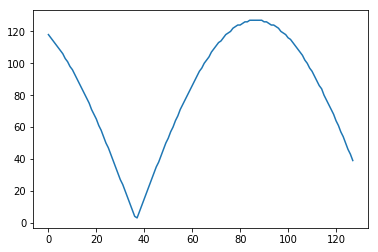

In [16]:
vec1 = img3[100, 64:192]
print(vec1)
plt.plot(vec1)

By inspecting such plot, what can you infer about the transition of the intensities? Is it abrupt/fast or slower/smooth?

Now let us obtain an array of similar size, but from the noisy image, and observe its transition patterns

[224 208 213 196 255 210 210 232 235 212 191 210 220 197 184 214 232 213
 215 251 198 203 201 233 234 225 165 209 218 200 211 213 187 230 228 205
 181 207 222 198 203 163 196 224 187 232 173 229 197 204 198 210 196 224
 194 190 219 195 193 192 191 191 190 246 182 215 193 186 200 213 155 235
 186 177 181 166 175 164 244 189 185 223 158 199 186 175 195 158 194 205
 224 178 173 195 159 177 195 177 194 167 162 154 157 187 212 203 152 198
 163 194 204 201 161 193 181 198 174 169 200 170 167 150 182 202 191 179
 177 174]


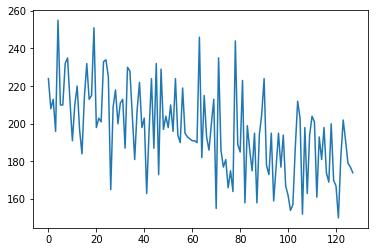

In [15]:
vec2 = img2[100, 64:192]
print(vec2)
plt.plot(vec2)

Compare the two plots. *Note how the first has a slower transition, while the second the values oscilate faster along the $y$ direction*.

Now, considering there is a *repeated* patern of variation, we have the concept of **periodicity**.

In order to study such different transition patterns, we may use mathematical functions to describe such variation, considering the simplest as possible building block.

The most convenient functions come from trigonometrics, in particular the sinusoidal: **sine** and **cosine**.

Sinusoudal functions at low frequencies present slow or smooth variation, while high frequency functions present fast oscilations. Let us create a sine function evaluated in the intervalo between 0 and 2, with step 0.002.

First we create the variable responsible to define the sampling along the time axis.

In [5]:
t = np.arange(0, 2, 0.002)
print("Number of observations: ", t.shape)

Number of observations:  (1000,)


Now, we create a sine that is periodic with period $2\pi$

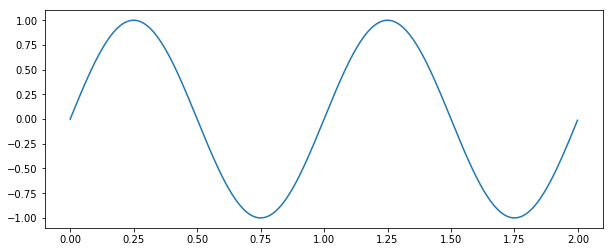

In [10]:
mysine = np.sin(2*np.pi*t)
plt.figure(figsize=(10,4))
plt.plot(t, mysine)